In [69]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


# **Tensors**

### **Creating Tensors**

Pytorch tensors are created using **`torch.tensor()`**<br>
for more info visit
 - https://pytorch.org/docs/stable/tensors.html
 - https://www.learnpytorch.io/00_pytorch_fundamentals/



In [70]:
# scalars : 0-dim tensor
scalar = torch.tensor(5)
scalar, type(scalar)

(tensor(5), torch.Tensor)

In [71]:
# dimension ndim of scalar
scalar.ndim

0

In [72]:
# get tensor back as python int
scalar.item(), type(scalar.item())

(5, int)

In [73]:
# vectors : 1-dim tensor
vector = torch.tensor([2,3])
vector, type(vector)

(tensor([2, 3]), torch.Tensor)

In [74]:
vector.ndim

1

In [75]:
vector.shape

torch.Size([2])

In [76]:
# MATRIX: 2-dim tensor

MATRIX = torch.tensor([[1,2],[3,4]])
MATRIX, type(MATRIX)

(tensor([[1, 2],
         [3, 4]]),
 torch.Tensor)

In [77]:
MATRIX.ndim

2

In [78]:
MATRIX.shape

torch.Size([2, 2])

In [79]:
MATRIX[0], MATRIX[1]

(tensor([1, 2]), tensor([3, 4]))

In [80]:
# TENSOR: multi dimensional array/matrix of numbers (ndim > 2)

TENSOR = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
TENSOR, type(TENSOR)

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Tensor)

In [81]:
TENSOR.ndim

3

In [82]:
# 1 element with 3 rows and 3 columns

TENSOR.shape

torch.Size([1, 3, 3])

In [83]:
# 1 element with 3 rows and 3 columns

TENSOR.size()

torch.Size([1, 3, 3])

### **Random Tensors**

Why Random Tensors ?.

Random Tensors are important because the way many neural networks learn, they start with tensors full of random numbers and then adjust them to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

For more info visit
- https://pytorch.org/docs/stable/generated/torch.rand.html

In [84]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor, random_tensor.dtype

(tensor([[0.5613, 0.0339, 0.6187, 0.1941],
         [0.0540, 0.6234, 0.6633, 0.9579],
         [0.4880, 0.6292, 0.3648, 0.1480]]),
 torch.float32)

In [85]:
random_tensor.ndim, random_tensor.shape , random_tensor.size()

(2, torch.Size([3, 4]), torch.Size([3, 4]))

In [86]:
random_tensor = torch.rand(2,3,4)
random_tensor

tensor([[[0.7052, 0.0946, 0.4520, 0.6011],
         [0.0554, 0.0017, 0.5594, 0.4866],
         [0.9388, 0.9364, 0.1465, 0.5211]],

        [[0.7731, 0.1831, 0.9833, 0.5996],
         [0.9421, 0.6217, 0.9665, 0.1663],
         [0.5859, 0.0823, 0.5310, 0.6185]]])

In [87]:
random_tensor.ndim, random_tensor.shape , random_tensor.size()

(3, torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

In [88]:
# Create a random tensor with similar shape to an image tensor

random_image_size_tensor = torch.rand(size=(3,224,224)) # height, width, color channels (R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

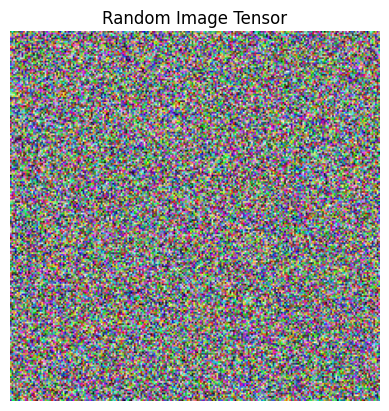

In [89]:
# Convert from CHW to HWC for matplotlib
# permute helps to change dimension positions

image_for_plot = random_image_size_tensor.permute(1, 2, 0)

# Display using matplotlib
plt.imshow(image_for_plot)
plt.title("Random Image Tensor")
plt.axis('off')  # Hide axes
plt.show()

### **Zeros and Ones**

In [90]:
# Create a tensor of all zeros
zeros_tensor = torch.zeros(size=(3,4))
zeros_tensor, zeros_tensor.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [91]:
# Create a tensor of all ones
ones_tensor = torch.ones(size=(3,4))
ones_tensor, ones_tensor.dtype, type(ones_tensor)

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32,
 torch.Tensor)

### **Creating a range of tensors and tensor-like**

Find more about arange at - https://pytorch.org/docs/stable/generated/torch.arange.html

In [92]:
# Use torch.range, if get deprecated message, use torch.arange()
one_to_ten = torch.range(0, 10) # from 0 to 10
one_to_ten

/tmp/ipython-input-92-2570536386.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  one_to_ten = torch.range(0, 10) # from 0 to 10


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [93]:
# torch.arange()
one_to_ten = torch.arange(0, 10)
one_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
one_to_thousand = torch.arange(start= 0, end= 1000, step= 50) # 0 to 1000 with a gap of 50 in each next value
one_to_thousand

tensor([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
        700, 750, 800, 850, 900, 950])

In [95]:
# Create tensors like
ten_zeros = torch.zeros_like(input= one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### **Tensor datatypes**

- **Float32:** `It is the default data type for tensors` a 32-bit
floating-point number.
  
* The `float64` provides more precise results than `float32`, but it takes
longer to compute.

* There is a tradeoff between precision and computational costs.

Datatypes tell about the **`precision`**`(number of digits used to describe a numerical value)`of a numerical quantity/term.
See more about precision at - https://en.wikipedia.org/wiki/Precision_(computer_science)

See more about tensor datatypes at - https://pytorch.org/docs/stable/tensors.html

**Note:** Tensor datatypes raise one of 3 biggest issues in deeplearning, you will face using Pytorch:

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device


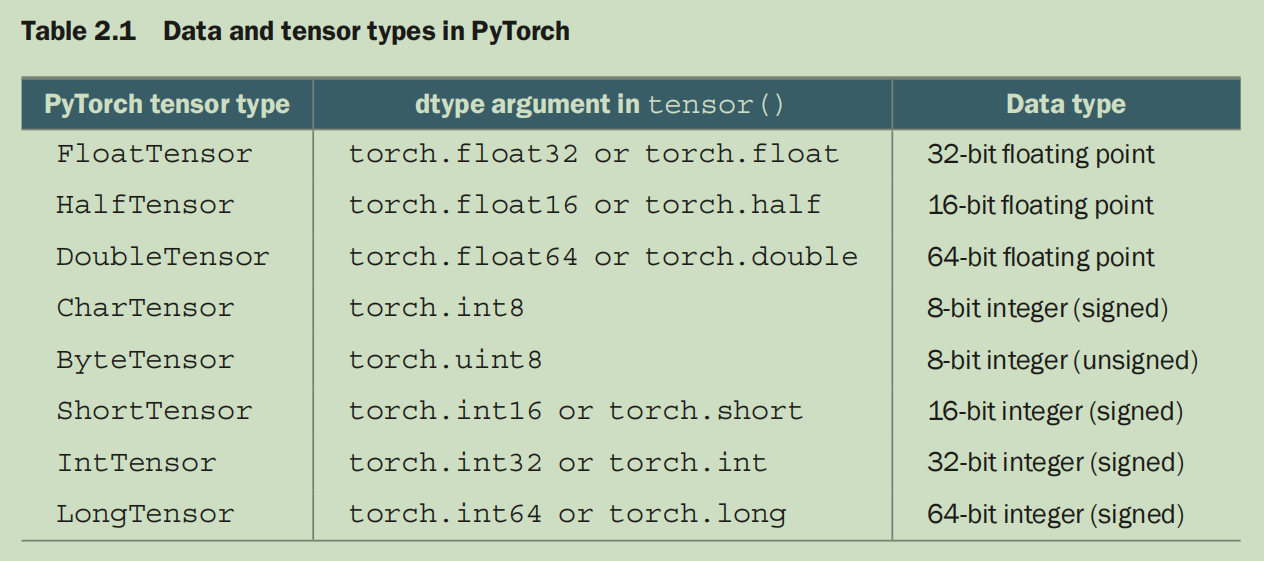

In [96]:
# Float 32 tensors: Default tensor type
float_32_tensor = torch.tensor([2.0, 4.0, 6.0, 8.0],
                               dtype= None, # what datatype is tensor (e.g. float16 or float32)
                               device= None, # device tensor is on, cpu, gpu, cuda
                               requires_grad= False) # weather or not to track gradients with this tensor operations
float_32_tensor, float_32_tensor.dtype

(tensor([2., 4., 6., 8.]), torch.float32)

In [97]:
# Float 16 tensor
float_32_to_16_tensor = torch.tensor([2.0, 4.0, 6.0, 8.0], dtype= torch.float16)
float_32_to_16_tensor, float_32_to_16_tensor.dtype

(tensor([2., 4., 6., 8.], dtype=torch.float16), torch.float16)

In [98]:
float_16_tensor = float_32_tensor.type(torch.float16) # torch.float16 and torch.half are same
float_16_tensor, float_16_tensor.dtype

(tensor([2., 4., 6., 8.], dtype=torch.float16), torch.float16)

In [99]:
# the multiplication worked here, but not for all operations,
# for some we need tensors to be of same datatype
float_16_tensor * float_32_tensor

tensor([ 4., 16., 36., 64.])

In [100]:
# Create integer tensors
t1=torch.IntTensor([1, 2, 3])
t2=torch.tensor([1, 2, 3],
  dtype=torch.int)
print(t1)
print(t2)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [101]:
int_32_tensor = torch.tensor([4,6,8,10], dtype= torch.int32)
int_32_tensor, int_32_tensor.dtype

(tensor([ 4,  6,  8, 10], dtype=torch.int32), torch.int32)

In [102]:
float_32_tensor * int_32_tensor

tensor([ 8., 24., 48., 80.])

In [103]:
# create a long tensor
long_tensor = torch.tensor([4,6,8,10], dtype= torch.long)
long_tensor, long_tensor.dtype

(tensor([ 4,  6,  8, 10]), torch.int64)

In [104]:
res = float_32_tensor * long_tensor
res, res.dtype

(tensor([ 8., 24., 48., 80.]), torch.float32)

In [105]:
# does order change effect result datatype ?.
res = long_tensor * float_32_tensor
res, res.dtype

(tensor([ 8., 24., 48., 80.]), torch.float32)

## Concatenating Tensors

In [106]:
tensor_1 = torch.tensor([1,2,3,4,5], dtype=torch.float32)
tensor_2 = torch.tensor([6,7,8,9,10], dtype=torch.float32)

concatenated = torch.cat([tensor_1, tensor_2
                          ], dim=0) # dim to concat
concatenated

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Getting information from Tensors

1. Tensors not right datatype - to get data type use `tensor.dtype`
2. Tensors not right shape - to get shape use `tensor.shape`
3. Tensors not on the right device - to get device tensor is on use `tensor.device`

In [107]:
a_tensor = torch.rand(4,3)
a_tensor

tensor([[0.8601, 0.0883, 0.2204],
        [0.3660, 0.2046, 0.2118],
        [0.7204, 0.2343, 0.5369],
        [0.8946, 0.0715, 0.9009]])

In [108]:
# Details about the tensor
print(a_tensor)
print(f"Datatype of tensor: {a_tensor.dtype}")
print(f"Size of tensor: {a_tensor.size()}")
print(f"Shape of tensor: {a_tensor.shape}")
print(f"Device of tensor: {a_tensor.device}")

tensor([[0.8601, 0.0883, 0.2204],
        [0.3660, 0.2046, 0.2118],
        [0.7204, 0.2343, 0.5369],
        [0.8946, 0.0715, 0.9009]])
Datatype of tensor: torch.float32
Size of tensor: torch.Size([4, 3])
Shape of tensor: torch.Size([4, 3])
Device of tensor: cpu


## Manipulating Tensors (tensor operations)
Tensor operrations include:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [109]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [110]:
# Multiply tensor with 10
new_tensor = tensor * 10
new_tensor

tensor([10, 20, 30])

In [111]:
# Subtract 10 from tensor
s_tensor = tensor - 10
s_tensor

tensor([-9, -8, -7])

In [112]:
# Try pytorch built in functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [113]:
torch.add(tensor, 10)

tensor([11, 12, 13])

### Matrix multiplication

There are two ways of multiplications done in neural networks and deep learning

1. Element-wise multipplication
2. Matrix multiplication (dot product)


Learn more about matrix multiplication at - https://www.mathsisfun.com/algebra/matrix-multiplying.html


There are two rules you must satisfy to do matrix multiplication:
1. The **inner dimensions** must match:
* `(3,2) @ (3, 2)` won't work
* `(2,3) @ (3, 2)` will work
* `(3,2) @ (2, 3)` will work
2. The resulting matrix has shape of **outer dimensions:**
* `(2,3) @ (3, 2)` -> `(2, 2)`
* `(3,2) @ (2, 3)` -> `(3, 3)`

In [114]:
# Element wise multiplication
tensor = torch.tensor([1, 2, 3])
print(f"{tensor} * {tensor}")
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [115]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [116]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3

14

In [117]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 838 µs, sys: 0 ns, total: 838 µs
Wall time: 846 µs


In [118]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 153 µs, sys: 8 µs, total: 161 µs
Wall time: 166 µs


tensor(14)

In [119]:
# using @ instead of matmul
tensor @ tensor

tensor(14)

## Errors in matrix operations deep learning

#### One of most common errors in deep learning: shape errors

In [120]:
# Shapes for matrix multiplication
tensorA = torch.tensor([[1, 3],
                        [4, 6],
                        [7, 9]])

tensorB = torch.tensor([[10, 12],
                        [13, 15],
                        [16, 18]])

torch.mm(tensorA, tensorB.T) # torch.mm is the same as torch.matmul (it's an alias for torch.matmul)

tensor([[ 46,  58,  70],
        [112, 142, 172],
        [178, 226, 274]])

To fix the shape issues we can manipulate shape of one of our tensors using a **transpose**.

A **Transpose** switches the axis or dimensions of a given tensor.

In [121]:
tensorB, tensorB.shape

(tensor([[10, 12],
         [13, 15],
         [16, 18]]),
 torch.Size([3, 2]))

In [122]:
tensorB.T, tensorB.T.shape

(tensor([[10, 13, 16],
         [12, 15, 18]]),
 torch.Size([2, 3]))

In [123]:
# matmul works noa as dim of tensorA is (3, 2) and tensorB.T is (2, 3)
# which are compatiable for matrix multiplication.
torch.matmul(tensorA, tensorB.T)

tensor([[ 46,  58,  70],
        [112, 142, 172],
        [178, 226, 274]])

## Finding the min, max, sum, avg etc (tensor aggregation)

In [124]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [125]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [126]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [127]:
# Find the mean
# x is long, need it in floating point to calculate mean, say need float32 dtype
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [128]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

#### Finding positional min and max with argmin(), argmax(). returns index of min and max

In [129]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [130]:
x.argmin(), x.argmax()

(tensor(0), tensor(9))

### Find mean and median

In [131]:
tensor_= torch.tensor([1,3,5,2,3,6,7,8,6,9,44,5,67,32,45], dtype=torch.float32)

print(torch.mean(tensor_,dim=0)), print(torch.median(tensor_))

tensor(16.2000)
tensor(6.)


(None, None)

## Reshaping, squeezing, stacking and unstacking

* Reshaping - reshapes a tensor to a defined shape
* View - returns a view of the original tensor keeping the same memory as original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - returns a view of the input with dimensions permuted (swapped) in certain way.


In [132]:
import torch
x = torch.arange(1., 13.)
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 torch.Size([12]))

In [133]:
x_reshaped =  x.reshape(3, 4)
x_reshaped, x_reshaped.shape

(tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]),
 torch.Size([3, 4]))

In [134]:
# Change the view

z = x_reshaped.view(1, 12)
z, z.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]]),
 torch.Size([1, 12]))

In [135]:
# Changing z will change x (because the view of a tensor shares the same memory as original tensor)
z [:, 0] = 5 # change element at index 0 to 5.
z, x

(tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]]),
 tensor([ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]))

In [136]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # dim 0 is row wise, dim 1 is column wise.
x_stacked

tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [137]:
x_stacked = torch.stack([x, x, x, x], dim=1) # dim 0 is row wise, dim 1 is column wise.
x_stacked

tensor([[ 5.,  5.,  5.,  5.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.],
        [11., 11., 11., 11.],
        [12., 12., 12., 12.]])

In [138]:
x_h_stacked = torch.hstack([x, x, x, x]) # stack horizontally row wise, dim = 0
x_h_stacked

tensor([ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  5.,  2.,
         3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  5.,  2.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10., 11., 12.,  5.,  2.,  3.,  4.,  5.,  6.,
         7.,  8.,  9., 10., 11., 12.])

In [139]:
x_v_stacked = torch.vstack([x, x, x, x]) # stack vertically column wise, dim = 1
x_v_stacked

tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [140]:
x_reshaped =  x.reshape(1, 12)
x_reshaped, x_reshaped.shape

(tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]]),
 torch.Size([1, 12]))

In [141]:
# torch.squeeze() - removes 1-dim from the tensor
x_squeezed = x_reshaped.squeeze()
x_squeezed, x_squeezed.shape

(tensor([ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 torch.Size([12]))

In [142]:
# torch.unsqueeze() - adds a single dimension to the tensor at specific dim/axis(dimension)
x_unsqueezed = x_squeezed.unsqueeze(dim = 0)
x_unsqueezed, x_unsqueezed.shape

(tensor([[ 5.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]]),
 torch.Size([1, 12]))

In [143]:
# torch.permute() - rearranges the dimensions of a target tensor in specified order
x_original = torch.rand(size= (24, 24, 3)) #[height, width, color_channels]

# permute x_original
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([24, 24, 3])
New shape: torch.Size([3, 24, 24])


In [144]:
## Indexing (selecting data from tensors)
x = torch.arange(1, 10).reshape(3,3)
x, x.shape

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 torch.Size([3, 3]))

In [145]:
x[0][0], x[1][0], x[2][0]

(tensor(1), tensor(4), tensor(7))

In [146]:
x_stacked = torch.stack([x[0][0], x[1][0], x[2][0]], dim= 0)
x_stacked

tensor([1, 4, 7])

In [147]:
x_u =  x.unsqueeze(dim= 0)
x_u, x_u.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [148]:
x_u[:, :, 1],x_u[:, 1, :]

(tensor([[2, 5, 8]]), tensor([[4, 5, 6]]))

## Pytorch tensors & Numpy

Numpy is popular scientific Python numerical computing library.

Pytorch has functionality to interact with it.

* Data in Numpy, want in Pytorch -> `torch.from_numpy(ndarray)`
* Pytorch tensor to numpy -> `torch.Tensor.numpy()`


In [149]:
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when covnerting to pytorch from numpy -> pytorch uses the default data type of the numpy array to create tensor
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [150]:
array.dtype, tensor.dtype

(dtype('float64'), torch.float64)

In [151]:
# Create from numpy array
nparr=np.array(range(10))
pt_tensor=torch.tensor(nparr, dtype=torch.int)
print(pt_tensor)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)


In [152]:
# Tensor to Numpy

tensor = torch.ones(2, 3)
array = tensor.numpy()
tensor, tensor.dtype, array

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 torch.float32,
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representation of data -> again -> again -> again ...`

To reducce the randomness in neural networks and Pytorch comes concept of a **random seed**.

Essentialy what the random seed does is "flavour" the randomness.

Setting a **`seed`** ensures you recieve the same random output everytime.


In [153]:
import torch

tensorA = torch.rand(3, 4)
tensorB = torch.rand(3, 4)

print(tensorA)
print(tensorB)
print(tensorA == tensorB)

tensor([[0.1590, 0.1981, 0.3168, 0.6987],
        [0.9615, 0.0317, 0.2158, 0.0603],
        [0.4292, 0.3719, 0.4859, 0.5309]])
tensor([[0.6714, 0.5425, 0.3051, 0.5901],
        [0.2283, 0.7357, 0.9412, 0.9213],
        [0.7126, 0.8262, 0.4416, 0.6456]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [154]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
tensorC = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
tensorD = torch.rand(3, 4)

print(tensorC)
print(tensorD)
print(tensorC == tensorD)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [155]:
tensorE = torch.rand(3, 4)
tensorE

tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])

In [156]:
torch.manual_seed(RANDOM_SEED)
tensorE = torch.rand(3, 4)
tensorE

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

#### Extra Resources for Reproducibility

Learn more at :
* https://pytorch.org/docs/stable/notes/randomness.html
* https://en.wikipedia.org/wiki/Random_seed

## Running tensors and PyTorch objects on the GPU (and making computations faster)

GPUs = faster computation of numbers. Cuda + Nvidia Hardware + Pytorch

In [157]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
gpu_tensor= torch.tensor([1,2,3,4], device='cuda') # can set to cpu
gpu_tensor, gpu_tensor.device

In [159]:
tensor = a_tensor.to(device)
tensor

tensor([[0.8601, 0.0883, 0.2204],
        [0.3660, 0.2046, 0.2118],
        [0.7204, 0.2343, 0.5369],
        [0.8946, 0.0715, 0.9009]])

##### **Note:**
if a tensor is on gpu you cannot convert it to numpy, you must take it bacck to cpu device.

In [160]:
tensor_np = tensor.cpu().numpy()
tensor_np, tensor_np.device

(array([[0.86010695, 0.08829051, 0.22041881],
        [0.3660063 , 0.20456618, 0.21178901],
        [0.72041494, 0.23430234, 0.5368761 ],
        [0.89463246, 0.07154506, 0.90091926]], dtype=float32),
 'cpu')